In [26]:
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.ephys.ephys_extractor import EphysSweepFeatureExtractor 
from allensdk.core.nwb_data_set import NwbDataSet

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
dir(EphysSweepFeatureExtractor)

['__doc__',
 '__init__',
 '__module__',
 '_get_baseline_voltage',
 '_process_bursts',
 '_process_individual_spikes',
 '_process_pauses',
 '_process_spike_related_features',
 'as_dict',
 'burst_metrics',
 'delay_metrics',
 'estimate_sag',
 'estimate_time_constant',
 'is_spike_feature_affected_by_clipping',
 'pause_metrics',
 'process_new_spike_feature',
 'process_new_sweep_feature',
 'process_spikes',
 'set_stimulus_amplitude_calculator',
 'spike_feature',
 'spike_feature_keys',
 'spikes',
 'stimulus_amplitude',
 'sweep_feature',
 'sweep_feature_keys',
 'voltage_deflection']

In [6]:
CTC.EPHYS_FEATURES_KEY()

TypeError: 'str' object is not callable

In [16]:
help(features._process_individual_spikes)

Help on method _process_individual_spikes in module allensdk.ephys.ephys_extractor:

_process_individual_spikes(self) unbound allensdk.ephys.ephys_extractor.EphysSweepFeatureExtractor method



In [17]:
#test it out

file_path = '\\\\allen\\programs\\celltypes\\production\\mousecelltypes\\prod90\\Ephys_Roi_Result_571715912\\571715912.nwb'

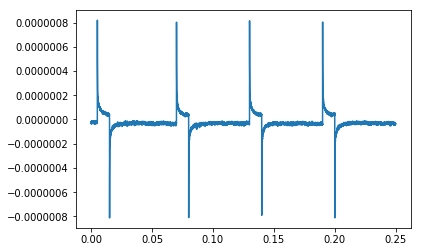

In [37]:
data = NwbDataSet(file_path)
sweep_data = data.get_sweep(2)
v = sweep_data['response']
i = sweep_data['stimulus']
v *= 1e3
i *= 1e12
t = np.arange(0,len(v)) *1./sweep_data['sampling_rate']
plt.plot(t,v)

In [38]:
sweep_ext = EphysSweepFeatureExtractor(t=t, v=v, i=i, start=1.02, end=2.02)
sweep_ext.process_spikes()
spike_times = sweep_ext.spike_feature('threshold_t')
print spike_times

FeatureError: Could not find given time in time vector